In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
import scipy.stats as stats # Stats API 
import sweetviz as sv
from IPython.display import Image
from IPython.core.display import HTML

plt.style.use('seaborn-white')


# Simple Linear Regression

In [1079]:
class LinearRegression:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.N, self.D = self.X.shape # N by D matrix
        
        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hat = np.dot(XtX_inverse, Xty)
    
    def predict(self, X_test):
        return np.dot(X_test, self.beta_hat)
    

In [1080]:
grade = pd.read_csv('./data/grade.csv')
grade.head()


,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


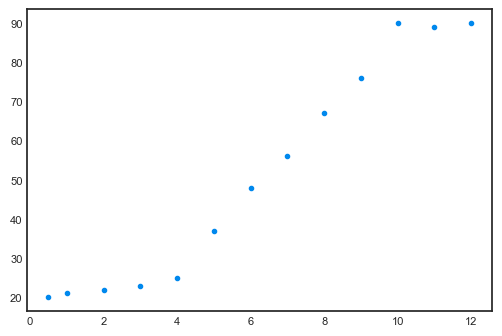

In [1081]:
X_grade_train = grade['Hours_Studied']
y_grade_train = grade['Test_Grade']

fig,ax = plt.subplots()
ax.scatter(X_grade_train, y_grade_train)

grade.corr()

In [1082]:
# self-implementation

lr = LinearRegression()

X_grade_train = np.c_[np.ones(len(X_grade_train)), X_grade_train.to_numpy()]

lr.fit(X_grade_train, y_grade_train)

y_grade_predicted = lr.predict(X_grade_train)

1 - np.sum((y_grade_train - y_grade_predicted)**2) / np.sum((y_grade_train - np.mean(y_grade_train) )**2)


0.9503677766997879

In [1083]:
# sklearn

import sklearn.linear_model as lm
from sklearn.metrics import r2_score

llr = lm.LinearRegression()
llr.fit(X_grade_train, y_grade_train)
r2_score(y_grade_train, llr.predict(X_grade_train))


0.9503677766997879

# Polynomial Function

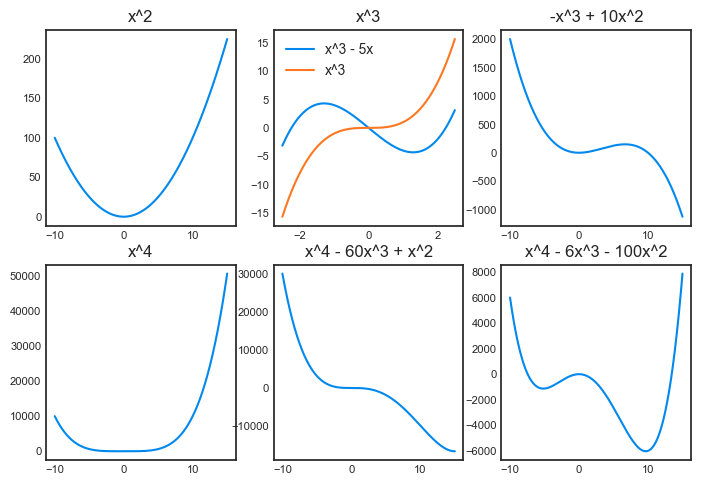

In [1085]:

fig, ax = plt.subplots(2, 3)

x = np.linspace(-10, 15, 1000)
ax[0, 0].plot(x, x**2)
ax[0, 0].set_title('x^2')

x = np.linspace(-2.5, 2.5, 1000)
ax[0, 1].plot(x, x**3 - 5 * x, label='x^3 - 5x')
ax[0, 1].plot(x, x**3, label='x^3')
ax[0, 1].set_title('x^3')
ax[0, 1].legend()

x = np.linspace(-10, 15, 1000)
ax[0, 2].plot(x, -1* x**3 + 10 * x**2)
ax[0, 2].set_title('-x^3 + 10x^2')


ax[1, 0].plot(x, x**4, label='x^4')
ax[1, 0].set_title('x^4')


ax[1, 1].plot(x, x**4 - 20*x**3 + x**2)
ax[1, 1].set_title('x^4 - 60x^3 + x^2')

ax[1, 2].plot(x, x**4 - 6*x**3 - 100*x**2)
ax[1, 2].set_title('x^4 - 6x^3 - 100x^2')

plt.subplots_adjust(top=1.2, right=1.2)


# Cost Function and Contour

## Sample Data

X (40, 2) y (40,)


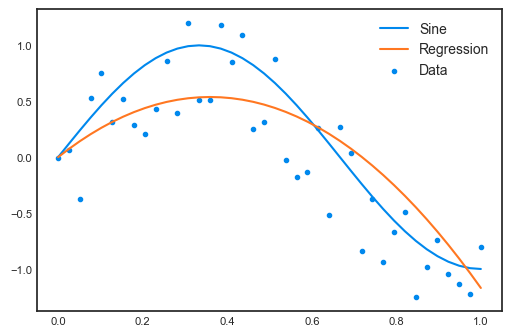

In [1086]:
noise = np.random.uniform(size=40)
x = np.linspace(0, 1, 40)
y = np.sin(x *1.5 * np.pi)

# Sample Data: N x 1
y_noise = (y + noise)
y_noise = y_noise - y_noise.mean()

# Design Matrix [x, x^2], N x 2
X = np.vstack((2*x, x**2)).T
X = X / np.linalg.norm(X, axis = 0)

print('X', X.shape, 'y', y_noise.shape)

plt.scatter(x, y_noise, label='Data')
plt.plot(x, y, label='Sine')
plt.plot(x, X @ np.array([11, -12]), label='Regression')
plt.legend()


## Regression

In [1087]:
def costFunction(X, y, theta):
    """cost function for linear regression"""
    delta = X @ theta - y

    return float(1 / 2 / len(X)) * (delta.T @ delta)


def gradient_descent(X, y, theta, alpha = 0.0005, num_iters=1000):
    theta_0 = []
    theta_1 = []
    loss_history = []

    for i in range(num_iters):
        loss_history.append(costFunction(X, y, theta))
        theta_0.append(theta[0])
        theta_1.append(theta[1])
        
        gradient = 2 * (X.T @ (np.dot(X, theta) - y))
        theta = theta - alpha * gradient

    return theta, loss_history, theta_0, theta_1


def closed_form_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y



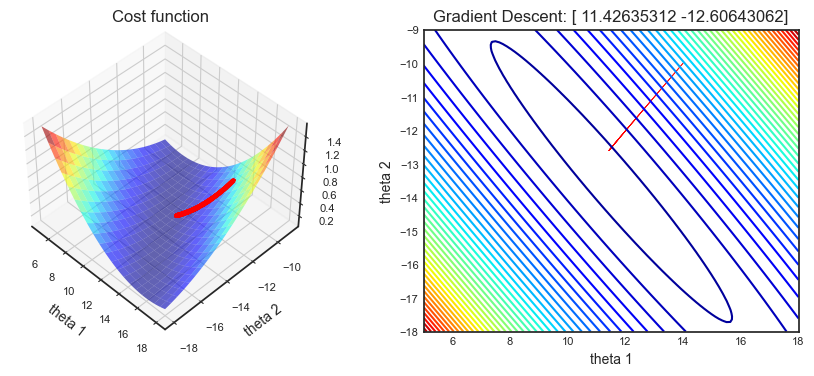

In [1088]:
# different thetas
T0, T1 = np.meshgrid(np.linspace(5, 18, 100), np.linspace(-18, -9, 100))

# different loss for different thetas
loss_list = np.array([costFunction(X, y_noise, np.array([t0, t1]))
                      for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])

# reshape loss_list
loss_list = loss_list.reshape(100, 100)

# record 'gradient descent' path from a random point, 
theta, loss_history, theta_0, theta_1 = gradient_descent(X, y_noise, np.array([14, -10]))


# plot surface
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(T0, T1, loss_list, rstride=5, cstride=5, cmap='jet', alpha=0.6)
ax.plot(theta_0, theta_1, loss_history, marker='*', c='r', alpha=0.4)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title('Cost function') 
ax.view_init(45, -45)


# Angles needed for quiver plot 
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1] 
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

# plot contour and path
ax = fig.add_subplot(122)
ax.contour(T0, T1, loss_list, 40, cmap='jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, 
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title(f'Gradient Descent: {theta.ravel()}') 

plt.subplots_adjust(right=1.5)


## Ridge Regression

In [1089]:
def costFunctionRidge(X, y, theta, lamda = 6):
    delta = np.dot(X, theta) - y
    
    ridge_loss = lamda * np.sum(np.square(theta))
    
    return 1 / len(X) * (delta.T @ delta + ridge_loss)


def gradient_descent_ridge(X, y, theta, lamda = 6, alpha = 0.0005, iters=1000):
    theta_0 = []
    theta_1 = []
    loss_z = []

    for i in range(iters):
        theta_0.append(theta[0])
        theta_1.append(theta[1])
        loss_z.append(costFunctionRidge(X, y, theta, lamda))

        gradient = 2 * (X.T @ (np.dot(X, theta) - y)) + lamda*theta
        theta = theta - alpha * gradient

    return theta, loss_z, theta_0, theta_1


def closed_form_ridge_solution(X, y, lamda = 1):
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y


def cost_L2(t0, t1):
    return t0**2 + t1**2


def cost_L1(t0, t1):
    return np.abs(t0) + np.abs(t1)


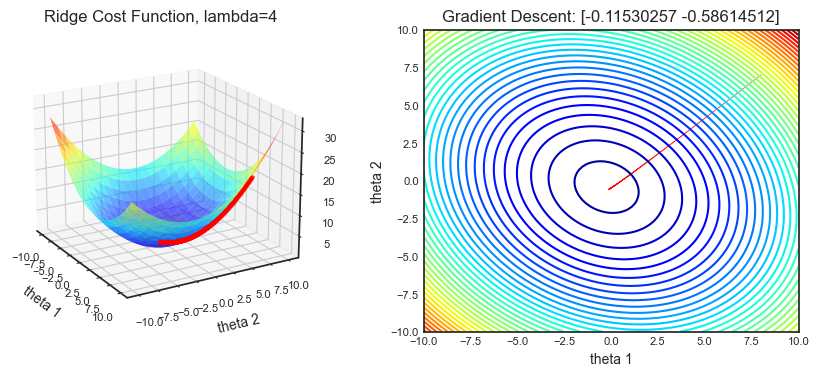

In [1090]:
# learning with a random lambda
lamda = 4

# different thetas
T0, T1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# different loss for different thetas with the same lambda
loss_list = np.array([costFunctionRidge(X, y_noise, np.array([t0, t1]), lamda=lamda)
                      for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])

# reshape loss_list
loss_list = loss_list.reshape(100, 100)

# record 'gradient descent' path from a random point
theta, loss_history, theta_0, theta_1 = gradient_descent_ridge(X, y_noise, np.array([8, 7]), lamda=lamda)


# plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(T0, T1, loss_list, rstride=5, cstride=5, cmap='jet', alpha=0.6)
ax.plot(theta_0, theta_1, loss_history, marker='*', c='r', alpha=0.4)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title(f'Ridge Cost Function, lambda={lamda}') 
ax.view_init(20, -30)

# Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1] 
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

ax = fig.add_subplot(122)
ax.contour(T0, T1, loss_list, 40, cmap='jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, 
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title(f'Gradient Descent: {theta.ravel()}') 


plt.subplots_adjust(right=1.5)


## Shrinking Effect

In [1091]:
# calculate a list of thetas as lambda changes: 0 -> Infinity
lamda_range = np.logspace(0, 4, num=100)/1000
L2_theta_0 = []
L2_theta_1 = []
for l in lamda_range:
    t0, t1 = closed_form_ridge_solution(X, y_noise, l)
    L2_theta_0.append(t0)
    L2_theta_1.append(t1)


# theta without regularization
LS_theta_0, LS_theta_1 = closed_form_solution(X, y_noise)



In [1094]:

# calculate a list of thetas as lambda changes: 0 -> Infinity
lamda_range = np.logspace(0, 4, num=100)/1000
L1_theta_0 = []
L1_theta_1 = []
for l in lamda_range:  
    lasso_model = linear_model.Lasso(alpha=l, fit_intercept=False)
    lasso_model.fit(X, y_noise)
    t0, t1 = lasso_model.coef_
    L1_theta_0.append(t0)
    L1_theta_1.append(t1)
    

<ipython-input-1093-9ce62e03d87f>:19: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(T0, T1, loss_L2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250], cmap = 'gist_gray', label = 'L2')
<ipython-input-1093-9ce62e03d87f>:20: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(T0, T1, loss_list, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
<ipython-input-1093-9ce62e03d87f>:34: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(T0, T1, loss_L1, levels = [.5,1,2,3,4,5,6,7,8,9,10], cmap = 'gist_gray', label = 'L1')
<ipython-input-1093-9ce62e03d87f>:35: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(T0, T1, loss_list, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')


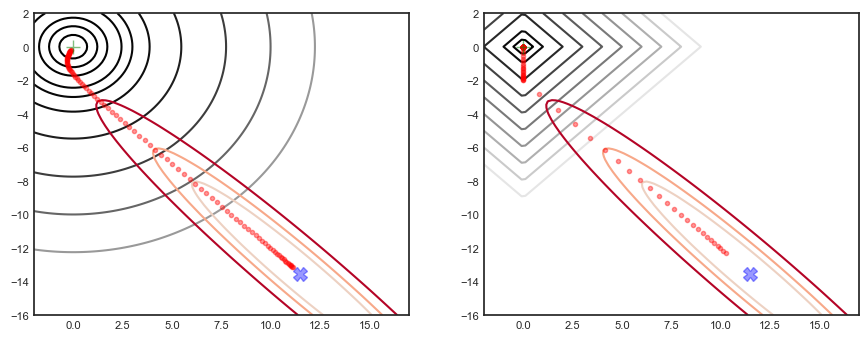

In [1093]:
T0, T1 = np.meshgrid(np.linspace(-2, 17, 100), np.linspace(-16, 2, 100))

loss_L2 = np.array([cost_L2(t0, t1) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])

loss_list = np.array([costFunction(X, y_noise, np.array([t0, t1]))
                      for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])

loss_L1 = np.array([cost_L1(t0, t1) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])

loss_L2 = loss_L2.reshape(T0.shape)
loss_list = loss_list.reshape(T0.shape)
loss_L1 = loss_L1.reshape(T0.shape)

# plot
fig = plt.figure()
ax = fig.add_subplot(121)

# lambda becomes larger, the radius becomes smaller, i.e. more close to 0
ax.contour(T0, T1, loss_L2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250], cmap = 'gist_gray', label = 'L2')
ax.contour(T0, T1, loss_list, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')

# no regularization
ax.plot(LS_theta_0, LS_theta_1, linestyle='none', marker='X', c='b', alpha=0.4, markersize=10)
# Ridge Path
ax.plot(L2_theta_0, L2_theta_1, linestyle='none', marker='o', c='r', alpha=0.4)
# Final Ridge
ax.plot(0, 0, linestyle='none', marker='+', c='g', alpha=0.5, markersize=10)


# plot
ax = fig.add_subplot(122)

# lambda becomes larger, the radius becomes smaller, i.e. more close to 0
ax.contour(T0, T1, loss_L1, levels = [.5,1,2,3,4,5,6,7,8,9,10], cmap = 'gist_gray', label = 'L1')
ax.contour(T0, T1, loss_list, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')

# no regularization
ax.plot(LS_theta_0, LS_theta_1, linestyle='none', marker='X', c='b', alpha=0.4, markersize=10)
# Ridge Path
ax.plot(L1_theta_0, L1_theta_1, linestyle='none', marker='o', c='r', alpha=0.4)
# Final Ridge
ax.plot(0, 0, linestyle='none', marker='+', c='g', alpha=0.5, markersize=10)

plt.subplots_adjust(right=1.5)

## Lasso Regression